In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
df = pd.read_csv('sarc_sample.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,Is patch 3.3 going to be our savior? Without t...
1,1,Yeah because Iran was 100% muslim prior to 197...,methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well a...
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND ...,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,Warriors / Clips game threads literally add ze...
3,1,"Yeah, it's dumb to run background checks on po...",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed wh..."
4,1,"Oh, it's not that bad once you get a handle on...",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.
...,...,...,...,...,...,...,...,...,...,...
59995,0,"room you mean like, dimension?",Tikikala,digimon,1,1,0,2016-03,2016-03-26 03:42:22,So as another guy pointed out. Huckmon might b...
59996,0,I wasn't too fond of grabner in 14 so I put Be...,mrhairybolo,hockey,1,1,0,2014-08,2014-08-10 05:57:31,Hall - Duchene - Grabner?
59997,0,he wasn't even at worlds in season 4!,Highstalker,leagueoflegends,-1,-1,0,2016-09,2016-09-19 14:41:23,Yeah he was.
59998,0,"Right, but the Trump sign...",gcbeehler5,pics,2,2,0,2016-09,2016-09-01 02:14:54,I wouldn't say you have to be liberal to appre...


In [257]:
df.describe()

,label,score,ups,downs
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.666667,6.848733,5.575717,-0.141433
std,0.471408,42.679615,39.408515,0.348471
min,0.000000,-143.000000,-143.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000
75%,1.000000,5.000000,4.000000,0.000000
max,1.000000,3325.000000,3325.000000,0.000000


In [244]:
um = df['label'] == 1
df[um].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
8780,1,"You are right I didn't notice that, must not b...",Sawii,GlobalOffensive,-2,-2,0,2016-05,2016-05-21 12:37:43,"because it was slowed down, nice flair btw"
34804,1,No one liked the crash mode!,shr3kgotad0nk,WTF,1,-1,-1,2016-11,2016-11-28 17:08:45,"After completing Burnout 3, Paradise is such a..."
24053,1,how dare you defend your citizens Israel,puloko,worldnews,4,4,0,2015-10,2015-10-04 19:32:43,Palestinian Authority condemns Israel for kill...
37185,1,I think he forgot his,ProtoDong,cringe,3,3,0,2016-07,2016-07-18 13:29:52,Got a source for that?


In [245]:
zero = df['label'] == 0
df[zero].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
48870,0,This is what happens when LA and London are no...,Deadlifted,nfl,1,1,0,2014-07,2014-07-29 22:39:44,Oakland Raiders in talks to relocate team to S...
50376,0,Someone stole the mirror off my car and I live...,Cocotapioka,pittsburgh,1,1,0,2015-01,2015-01-07 00:19:19,My girlfriend lives on Friendship Ave. near th...
47460,0,All setting up the last minute bump to get her...,indievideoguy,gifs,1,1,0,2016-02,2016-02-10 08:52:40,"He looks genuinely unwell, dude looks like he ..."
55905,0,Ahhh,ScarfacedTyrant,blackdesertonline,1,1,0,2016-09,2016-09-22 08:13:24,TIP: You can change channel and character simu...


## Etapas de pré-processamento

In [246]:
import string
def remover_pontuacao(text):
    sem_pontuacao="".join([i for i in text if i not in string.punctuation])
    return sem_pontuacao

In [247]:
def lower(text):
    return text.lower()

In [248]:
import re
def remove_nums(text):
    num_regex = '\d+'
    t = re.sub(num_regex, '', text)
    return t

In [249]:
import nltk
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    texto = [w for w in text.split() if w not in stopwords]
    frase = " ".join(texto)
    return frase

In [250]:
def preprocess(text):
        text = remove_nums(text)
        text = lower(text)
        text = remove_stop_words(text)
        text = remover_pontuacao(text)
        return text

## Gráficos

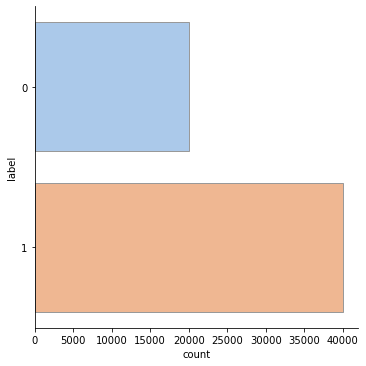

In [251]:
# Gráfico do balanceamento entre as classes
sns.catplot(y="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<AxesSubplot:xlabel='palavras'>

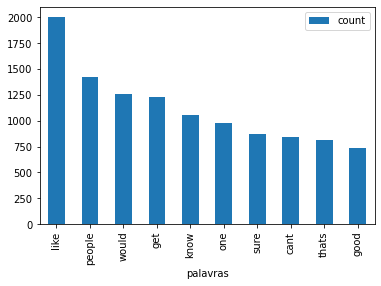

In [252]:
# Gráfico das palavras que aparecem com mais frequência na classe 1
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=''.join([str(w) for w in q['comment']])
P = preprocess(P)
palavras = P.split()
dfp = pd.DataFrame (palavras, columns = ['palavras'])
dfc = dfp.groupby('palavras').palavras.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc.plot.bar(x='palavras')

<AxesSubplot:xlabel='palavras'>

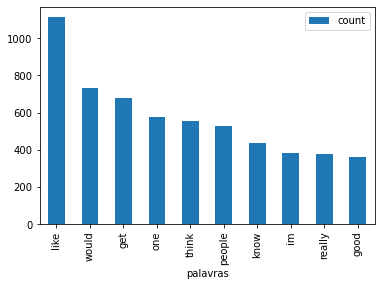

In [253]:
# Gráfico das palavras que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame().reset_index(drop=True)
P2=''.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
palavras2 = P2.split()
dfp2 = pd.DataFrame (palavras2, columns = ['palavras'])
dfc2 = dfp2.groupby('palavras').palavras.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc2.plot.bar(x='palavras')

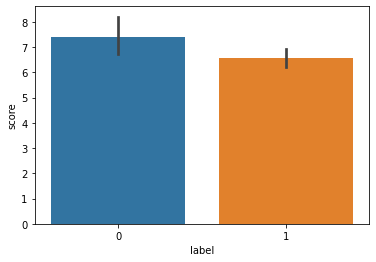

In [271]:
ax = sns.barplot(x="label", y="score", data=df)

In [278]:
data = [dfp["palavras"], dfp2["palavras"]]

In [299]:
dfp['label'] = 1
dfp2['label'] = 0
dfp3 = pd.concat([dfp, dfp2], axis=0)
dfp2.count()

palavras    105025
label       105025
dtype: int64

In [289]:
y = df[um].label
y = y.to_numpy()
y.shape

(40000,)